In [1]:
source("../funcs/limma.R")
source("../funcs/funcsR.R")
library(ggbreak)
library(scales)

---
# Mutational Signatures Plots

Plots for mutational signatures derived from WES samples in [Bustoros et al (2020)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7367550/).

**Author**: [Shankara Anand](sanand@broadinstitute.org)

In [2]:
mut.df <- read.delim("supplement/table8_mut_sigs.tsv", sep='\t', header=T, row.names=1)

In [7]:
addName <- function(s){
    if(s=="C1"){
        return("HL1")
    }else if(s=='C2'){
        return("HL2")
    }else if(s=='C3'){
        return("TL1")
    }else if(s=='C4'){
        return("HL3")
    }else if(s=='C5'){
        return("TL2")
    }else if(s=='C6'){
        return("HL4")
    }
}
        
mut.df$id <- factor(sapply(mut.df$consensus_nmf, addName), levels = c("HL1", "HL2", "TL1", "HL3", "TL2", "HL4"))

In [119]:
pdf('figures/S1_mut_sigs_barplots_a.pdf', width=8, height=4)
p1 <- plotSig(mut.df, "Aging.1_5", NA, x="id", label.pos='none', ylab='Weights', label.y = 1700, ylim.max=1800)
p1 <- p1 + scale_y_break(c(100,1600), scales=.1, ticklabels=c(75,100,1700,1800))
p1
dev.off()

Warning message:
“Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed”Warning message:
“Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed”Warning message:
“Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed”

png 
  2

In [120]:
pdf('figures/S1_mut_sigs_barplots_b.pdf', width=8, height=4)
p2 <- plotSig(mut.df, "APOBEC.activity.2_13", list(  c("HMC","CND"), c("FMD","CND"), c("HNT","HMC")), 
              x="id", label.pos='none', ylab='Weights', ylim.max=120, label.y=100)
p2 <- p2 + scale_y_break(c(25,60), scales=.25, ticklabels=c(75,100))
p2
dev.off()

png 
  2

In [121]:
pdf('figures/S1_mut_sigs_barplots_c.pdf', width=8, height=4)
p3 <- plotSig(mut.df, "AID.84_85", NA, x="id", label.pos='none', ylab='Weights', label.y = 180, ylim.max=200)
p3 <- p3 + scale_y_break(c(25,100), scales=.25, ticklabels=c(75,150,200))
p3
dev.off()

Warning message:
“Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed”Warning message:
“Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed”Warning message:
“Removed 5 rows containing missing values (geom_point).”Warning message:
“Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed”Warning message:
“Removed 5 rows containing missing values (geom_point).”

png 
  2

In [123]:
mut.df$hmc <- ifelse(mut.df$id == "HMC", "+ HMC", "- HMC")
mut.df$fmd <- ifelse(mut.df$id == "FMD", "+ FMD", "- FMD")
mut.df$bof <- ifelse(mut.df$id %in% c("HMC","FMD"), "+ HMC/FMD", "- HMC/FMD")

In [24]:
if (mut.df$id == "HL1") TRUE else FALSE

Warning message in if (mut.df$id == "HL1") TRUE else FALSE:
“the condition has length > 1 and only the first element will be used”

[1] FALSE

In [38]:
p = list()
idx = 1

for (i in unique(mut.df$id)){
    mut.df$fix <- ifelse(mut.df$id==i, TRUE, FALSE)
    print(i)
    p[[idx]] <- plotSig(mut.df, "APOBEC.activity.2_13", NA, x="fix", 
                        label.pos='none', ylab='Weights', label.y = 75, ylim.max=100)
    idx = idx+1
}

pdf('figures/apobec_fdr.pdf', width=6, height=8)
ggarrange(p[[1]],p[[2]],p[[3]],p[[4]], p[[5]],p[[6]],
          labels = c("TL2","TL1","HL1","HL4","HL3","HL2"), ncol = 2, nrow = 3
)
dev.off()


[1] "TL2"
[1] "TL1"
[1] "HL1"
[1] "HL4"
[1] "HL3"
[1] "HL2"


Warning message:
“Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed”Warning message:
“Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed”Warning message:
“Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed”Warning message:
“Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed”Warning message:
“Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed”Warning message:
“Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed”

png 
  2

In [42]:
p = list()
idx = 1

for (i in unique(mut.df$id)){
    mut.df$fix <- ifelse(mut.df$id==i, TRUE, FALSE)
    print(i)
    p[[idx]] <- plotSig(mut.df, "Aging.1_5", NA, x="fix", 
                        label.pos='none', ylab='Weights', label.y = 75)
    idx = idx+1
}

pdf('figures/aging_fdr.pdf', width=6, height=8)
ggarrange(p[[1]],p[[2]],p[[3]],p[[4]], p[[5]],p[[6]],
          labels = c("TL2","TL1","HL1","HL4","HL3","HL2"), ncol = 2, nrow = 3
)
dev.off()

[1] "TL2"
[1] "TL1"
[1] "HL1"
[1] "HL4"
[1] "HL3"
[1] "HL2"


Warning message:
“Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed”Warning message:
“Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed”Warning message:
“Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed”Warning message:
“Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed”Warning message:
“Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed”Warning message:
“Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed”

png 
  2

Warning message:
“Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed”

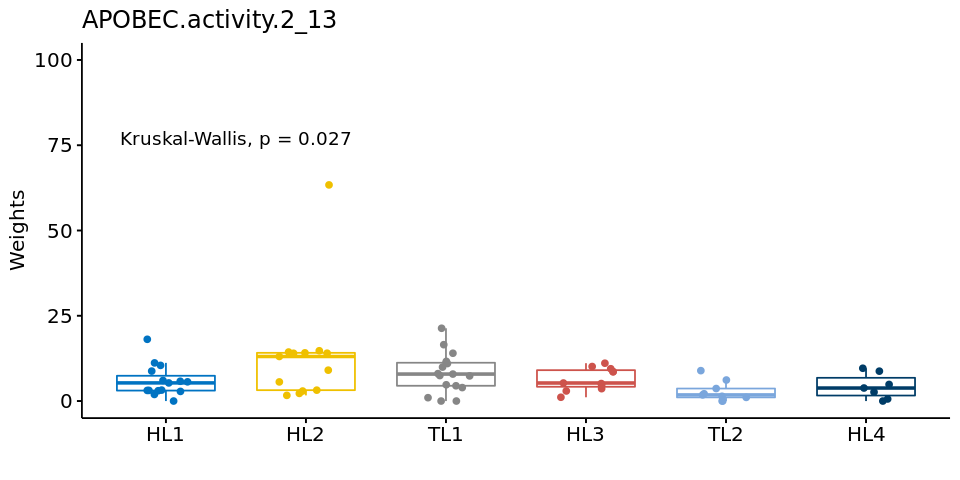

In [16]:
p <- plotSig(mut.df, "APOBEC.activity.2_13", NA, x="id", label.pos='none', ylab='Weights', label.y = 75, ylim.max=100)
p

Warning message:
“Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed”ERROR while rich displaying an object: Error: Insufficient values in manual scale. 6 needed but only 2 provided.

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content

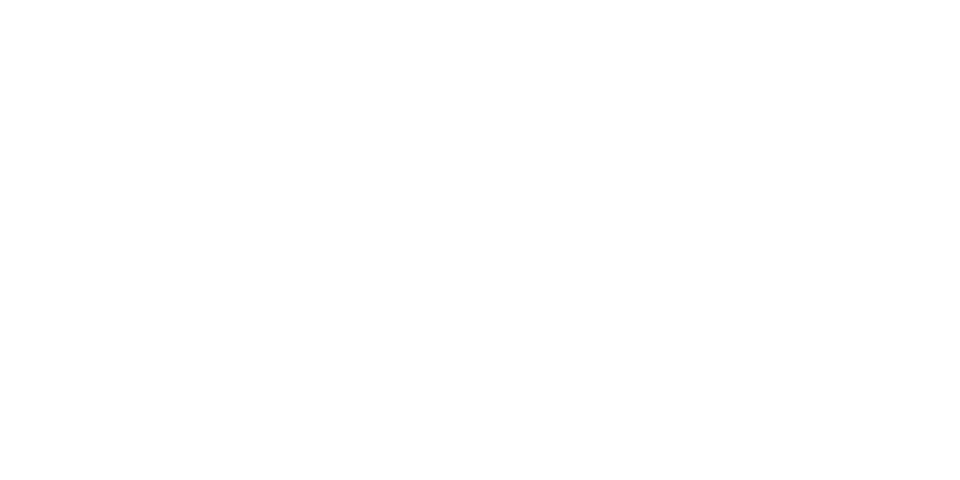

In [13]:
p <- plotSig(mut.df, "APOBEC.activity.2_13", NA, x="id", label.pos='none', ylab='Weights', label.y = 75, ylim.max=100, palette=c('lightblue','darkorange'))
#p <- p + scale_y_break(c(25,55), scales=.25, ticklabels=c(65, 85))
p

In [143]:
pdf('figures/S1_apobec_mut_sigs.pdf', width=4, height=4)
p <- plotSig(mut.df, "APOBEC.activity.2_13", NA, 
             x="bof", label.pos='none', ylab='Weights', label.y = 75, ylim.max=100, palette=c('lightblue','darkorange'))
p <- p + scale_y_break(c(25,55), scales=.25, ticklabels=c(65, 85))
p
dev.off()

Warning message:
“Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed”Warning message:
“Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed”Warning message:
“Computation failed in `stat_signif()`:
missing value where TRUE/FALSE needed”

png 
  2

In [9]:
p1 <- plotSig(mut.df, "APOBEC.activity.2_13", list(  c("- HMC","+ HMC")), x="hmc", label.pos='none', ylab='Weights', label.y = 0)
p2 <- plotSig(mut.df, "APOBEC.activity.2_13", list(  c("- FMD","+ FMD")), x="fmd", label.pos='none', ylab='Weights', label.y = 0)
p3 <- plotSig(mut.df, "APOBEC.activity.2_13", list(  c("- HMC/FMD","+ HMC/FMD")), x="bof", label.pos='none', ylab='Weights', label.y = 0)

pdf('figures/S3b_apobec_pairs_barplots.pdf', width=4, height=12)
ggarrange(p1,p2,p3,labels = c("A", "B"), ncol = 1, nrow = 3)
dev.off()

png 
  2